# ARIMA (Auto Regressive Integrated Moving Average)

Also known as Box-Jenkins 1976 methodology

###### What is ARIMA modeling?
1. A method among several used in forecasting variables 
2. Uses the information obtained from the variables itself to forecast its trend 
3. The variable is regressed on its own past values 
4. Based on univariate analysis 
5. Knowing and analyzing the probabilistic, or stochastic, properties of variables 
6. Designed to forecast future movements 
7. Uses the philosophy "let the variable speak for itself”


###### ARIMA Model Specification: 
ARIMA (p, d, q) tells us 
*  p: The number of lag observations included in the model.
*  d: The number of times that the raw observations are differenced, also called the degree of differencing.
*  q: The size of the moving average window, also called the order of moving average.

example: 
1. ARIMA(1, 1, 2) indicates the model has: one lag of the dependent variable (1), the variable being used is of first-difference stationary (1) and two lags of the error term (2) 2. ARIMA(1, 0, 1) indicates the model has: one lag of the dependent variable (1), the variable being used is of level stationary (0) and one lag of the error term (1). 
3. ARIMA(1, 0, 1) = ARMA (1, 1) if the series is stationary in level

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the AutoCorrelation or Partial AutoCorrelation Charts
* Construct the ARIMA Model and Use it to make predictions

## Step 1 :Visualize the Time Series Data

### Get Data

In [1]:
import urllib.request, urllib.parse, urllib.error
import json
import pandas as pd
import urllib.request, urllib.parse, urllib.error
import json
import pandas as pd

def get_data(stock_name):
    api_key='XE1EPJJ09ZVCC448'
    if api_key is False:
        print("Please provide api key")
        exit()
    else :
        serviceurl = 'https://www.alphavantage.co/query?'

    parms = dict()
    parms['function']='TIME_SERIES_DAILY_ADJUSTED'
    parms['symbol'] = 'BSE:'+stock_name
    parms['outputsize']='full'
    if api_key is not False: 
        parms['apikey'] = api_key
    url = serviceurl + urllib.parse.urlencode(parms)

    print('Retrieving', url)

    uh = urllib.request.urlopen(url)
    data = uh.read().decode()
    print('Retrieved', len(data), 'characters')

    try:
        js = json.loads(data)
    except:
        js = None

    if (not js) or ("Error Message" in js.keys()):
        print('====***==== Failure To Retrieve Data====***====')
        exit()
    #to see what is returned remove comments after add comments
    #dataFile=open('dataFile.txt','w')
    #dataFile.write(json.dumps(js, indent=4))
    #print(json.dumps(js, indent=4))
    dataDates=list()
    dataOpen=list()
    dataHigh=list()
    dataLow=list()
    dataClose=list()
    dataAdjClose=list()
    dataVolume=list()
    for date in js['Time Series (Daily)'].keys():
        dataDates.append(date);
        dataOpen.append(js['Time Series (Daily)'][date]["1. open"]);
        dataHigh.append(js['Time Series (Daily)'][date]["2. high"]);
        dataLow.append(js['Time Series (Daily)'][date]["3. low"]);
        dataClose.append(js['Time Series (Daily)'][date]["4. close"]);
        dataAdjClose.append(js['Time Series (Daily)'][date]["5. adjusted close"]);
        dataVolume.append(js['Time Series (Daily)'][date]["6. volume"]);
    data={
        'Date':dataDates,
        'Open':dataOpen,
        'High':dataHigh,
        'Low':dataLow,
        'Close':dataClose,
        'Adj Close':dataAdjClose,
        'Volume':dataVolume
    }
    ans=pd.DataFrame(data)
    return ans

In [2]:
#pass name of company like tcs,hdfc,infy
data=get_data('infy')
data

Retrieving https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=BSE%3Ainfy&outputsize=full&apikey=XE1EPJJ09ZVCC448
Retrieved 1339471 characters


,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-30,1340.0,1399.85,1336.0,1385.55,1385.55,526058
1,2021-03-26,1341.0,1356.4,1332.5,1336.3,1336.3,176922
2,2021-03-25,1348.95,1349.7,1328.0,1333.75,1333.75,253133
3,2021-03-24,1362.0,1370.4,1346.6,1353.8,1353.8,116760
4,2021-03-23,1371.0,1383.3,1359.7,1371.2,1371.2,133032
...,...,...,...,...,...,...,...
3995,2005-01-07,2040.0,2064.7008,1995.0496,2050.9008,94.6656,12393856
3996,2005-01-06,2055.0,2093.0,1994.0,2043.1504,94.3077,7767552
3997,2005-01-05,2078.0,2078.0,2004.0,2051.8496,94.7093,5442928
3998,2005-01-04,2120.0,2120.0,2082.2496,2088.3504,96.3943,3134048


## Process Data

In [3]:
data.dropna(inplace=True)
data['Date']=pd.to_datetime(data['Date'])
data['Open']=pd.to_numeric(data['Open'])
data['High']=pd.to_numeric(data['High'])
data['Low']=pd.to_numeric(data['Low'])
data['Close']=pd.to_numeric(data['Close'])
data['Adj Close']=pd.to_numeric(data['Adj Close'])
data['Volume']=pd.to_numeric(data['Volume'])
    

In [4]:
new_data=data.copy()
new_data.sort_index(ascending=False,inplace =True)
new_data.set_index('Date',inplace=True)

In [5]:
new_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,2099.00,2125.0000,2095.5008,2117.3504,97.7329,1661184
2005-01-04,2120.00,2120.0000,2082.2496,2088.3504,96.3943,3134048
2005-01-05,2078.00,2078.0000,2004.0000,2051.8496,94.7093,5442928
2005-01-06,2055.00,2093.0000,1994.0000,2043.1504,94.3077,7767552
2005-01-07,2040.00,2064.7008,1995.0496,2050.9008,94.6656,12393856
...,...,...,...,...,...,...
2021-03-23,1371.00,1383.3000,1359.7000,1371.2000,1371.2000,133032
2021-03-24,1362.00,1370.4000,1346.6000,1353.8000,1353.8000,116760
2021-03-25,1348.95,1349.7000,1328.0000,1333.7500,1333.7500,253133


## Plot data

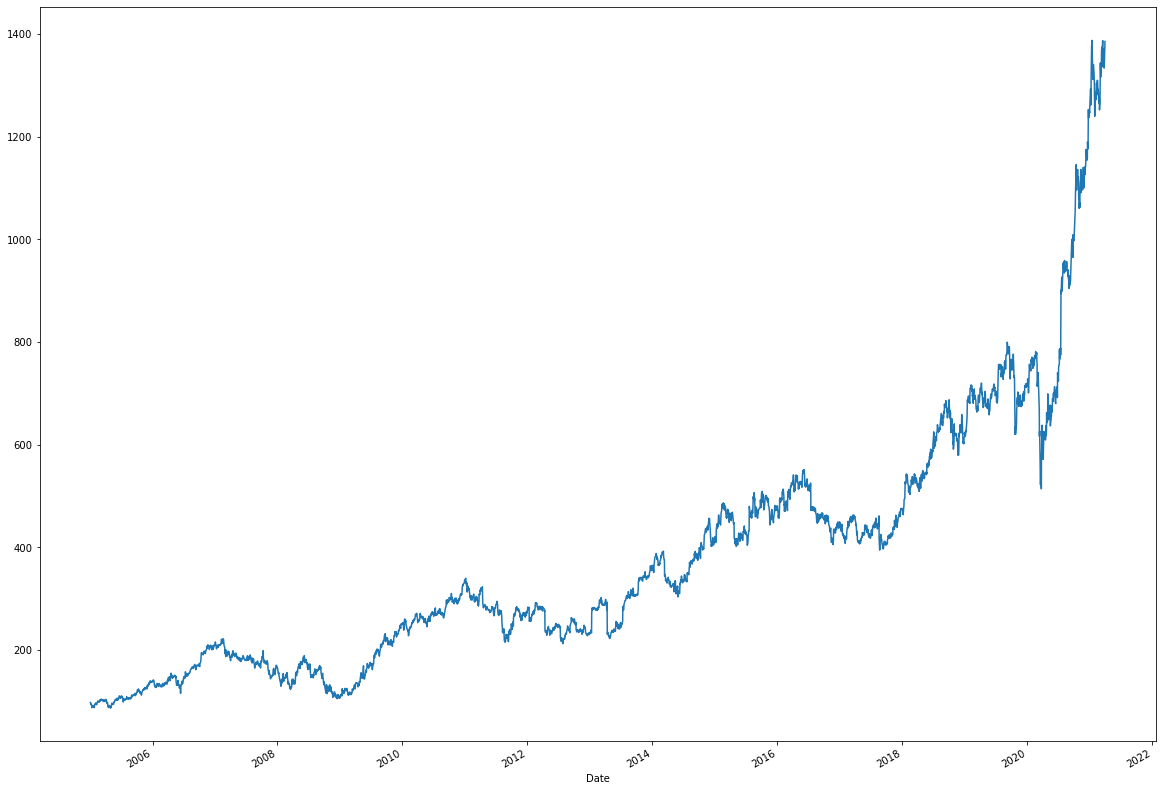

In [6]:
new_data['Adj Close'].plot(figsize=(20,15))

## Step 2 : Make the time series data stationary

### Testing for Stationarity

We can use the Augmented **Dickey-Fuller**

In statistics and econometrics, an augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample. The alternative hypothesis is different depending on which version of the test is used, but is usually stationarity or trend-stationarity.

Basically, we are trying to whether to accept the Null Hypothesis **H0** (that the time series has a unit root, indicating it is non-stationary) or reject **H0** and go with the Alternative Hypothesis (that the time series has no unit root and is stationary).

We end up deciding this based on the p-value return.

* A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

* A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so you fail to reject the null hypothesis.

Let's run the Augmented Dickey-Fuller test on our data:

In [7]:
# Store in a function for later use!
def adf_check(time_series):
    """
    Pass in a time series, returns ADF report
    """
    from statsmodels.tsa.stattools import adfuller
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [8]:
new_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,2099.0,2125.0000,2095.5008,2117.3504,97.7329,1661184
2005-01-04,2120.0,2120.0000,2082.2496,2088.3504,96.3943,3134048
2005-01-05,2078.0,2078.0000,2004.0000,2051.8496,94.7093,5442928
2005-01-06,2055.0,2093.0000,1994.0000,2043.1504,94.3077,7767552
2005-01-07,2040.0,2064.7008,1995.0496,2050.9008,94.6656,12393856


In [10]:
adf_check(new_data['Adj Close'])

Augmented Dickey-Fuller Test:
ADF Test Statistic : 3.7542160566599305
p-value : 1.0
#Lags Used : 31
Number of Observations Used : 3968
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


### Differencing

As our data is non-stationary we have to convert it into stationary.



Non-stationary data is converted to stationary in differencing. Also known as integration step in ARIMA.
The first difference of a time series is the series of changes from one period to the next.
You can continue to take the second difference, third difference, and so on until your data is stationary

In [11]:
new_data['First difference']=new_data['Adj Close'] - new_data['Adj Close'].shift(1)

In [12]:
new_data.head()

,Open,High,Low,Close,Adj Close,Volume,First difference
Date,,,,,,,
2005-01-03,2099.0,2125.0000,2095.5008,2117.3504,97.7329,1661184,NaN
2005-01-04,2120.0,2120.0000,2082.2496,2088.3504,96.3943,3134048,-1.3386
2005-01-05,2078.0,2078.0000,2004.0000,2051.8496,94.7093,5442928,-1.6850
2005-01-06,2055.0,2093.0000,1994.0000,2043.1504,94.3077,7767552,-0.4016
2005-01-07,2040.0,2064.7008,1995.0496,2050.9008,94.6656,12393856,0.3579


In [14]:
adf_check(new_data['First difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -12.381146700509904
p-value : 5.0258494578506367e-23
#Lags Used : 30
Number of Observations Used : 3968
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


so after first difference data is stationary so value of `d=1`

## Step 3 : Plot the AutoCorrelation or Partial AutoCorrelation Charts

### Auto Correlation 
An autocorrelation plot shows the correlation of the series with itself, lagged by x time units. 
So, the y axis is the correlation and the x axis is the number of time units of lag.


In [15]:
from statsmodels.graphics.tsaplots import plot_acf

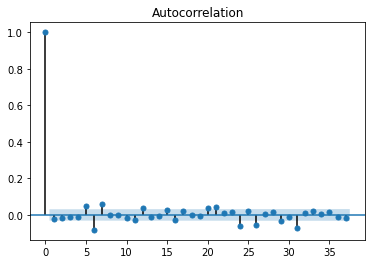

In [16]:
fig_first = plot_acf(new_data["First difference"].dropna())

### Partial Autocorrelation
In general, a partial correlation is a conditional correlation.

The partial autocorrelation at lag k is the autocorrelation between Yt and Yt−k that is not accounted for by lags 1 through k−1.

For instance, consider a regression context in which y = response variable and x1, x2, and x3 are predictor variables. The partial correlation between y and x3 is the correlation between the variables determined taking into account how both y and x3 are related to x1 and x2.


In [17]:
from statsmodels.graphics.tsaplots import plot_pacf

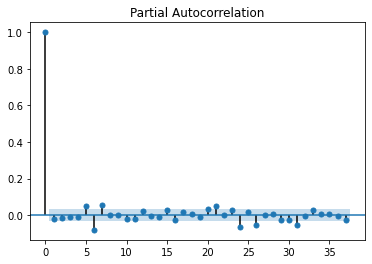

In [18]:
fig_second = plot_pacf(new_data["First difference"].dropna())

### Identification by using Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.

we can see that,

Our is AR model as PACF are equal to zero beyond 6.

so,`p=6` and `q=0`


In [19]:
new_data

,Open,High,Low,Close,Adj Close,Volume,First difference
Date,,,,,,,
2005-01-03,2099.00,2125.0000,2095.5008,2117.3504,97.7329,1661184,NaN
2005-01-04,2120.00,2120.0000,2082.2496,2088.3504,96.3943,3134048,-1.3386
2005-01-05,2078.00,2078.0000,2004.0000,2051.8496,94.7093,5442928,-1.6850
2005-01-06,2055.00,2093.0000,1994.0000,2043.1504,94.3077,7767552,-0.4016
2005-01-07,2040.00,2064.7008,1995.0496,2050.9008,94.6656,12393856,0.3579
...,...,...,...,...,...,...,...
2021-03-23,1371.00,1383.3000,1359.7000,1371.2000,1371.2000,133032,0.7000
2021-03-24,1362.00,1370.4000,1346.6000,1353.8000,1353.8000,116760,-17.4000
2021-03-25,1348.95,1349.7000,1328.0000,1333.7500,1333.7500,253133,-20.0500


## Step 4 : Construct the ARIMA Model

In [20]:
new_data=new_data[-222:]
def split_data():
    d= new_data['Adj Close'].values
    train_data = d[0:int(len(d)*0.7)]
    test_data = d[int(len(d)*0.7):]
    return  train_data, test_data
train,test=split_data()

In [21]:
def ARIMA_train_predict_for_test(train,test):
    from statsmodels.tsa.arima_model import ARIMA
    history = [x for x in train]
    model_predictions = []
    for time_point in range(len(test)):
        print(time_point,end=" ")
        model = ARIMA(history, order=(6,1,0))
        model_fit = model.fit(disp=0)
        output = model_fit.forecast()
        yhat = output[0]
        model_predictions.append(yhat)
        true_test_value = test[time_point]
        history.append(true_test_value)
    return model_predictions


model_predictions=ARIMA_train_predict_for_test(train,test)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 

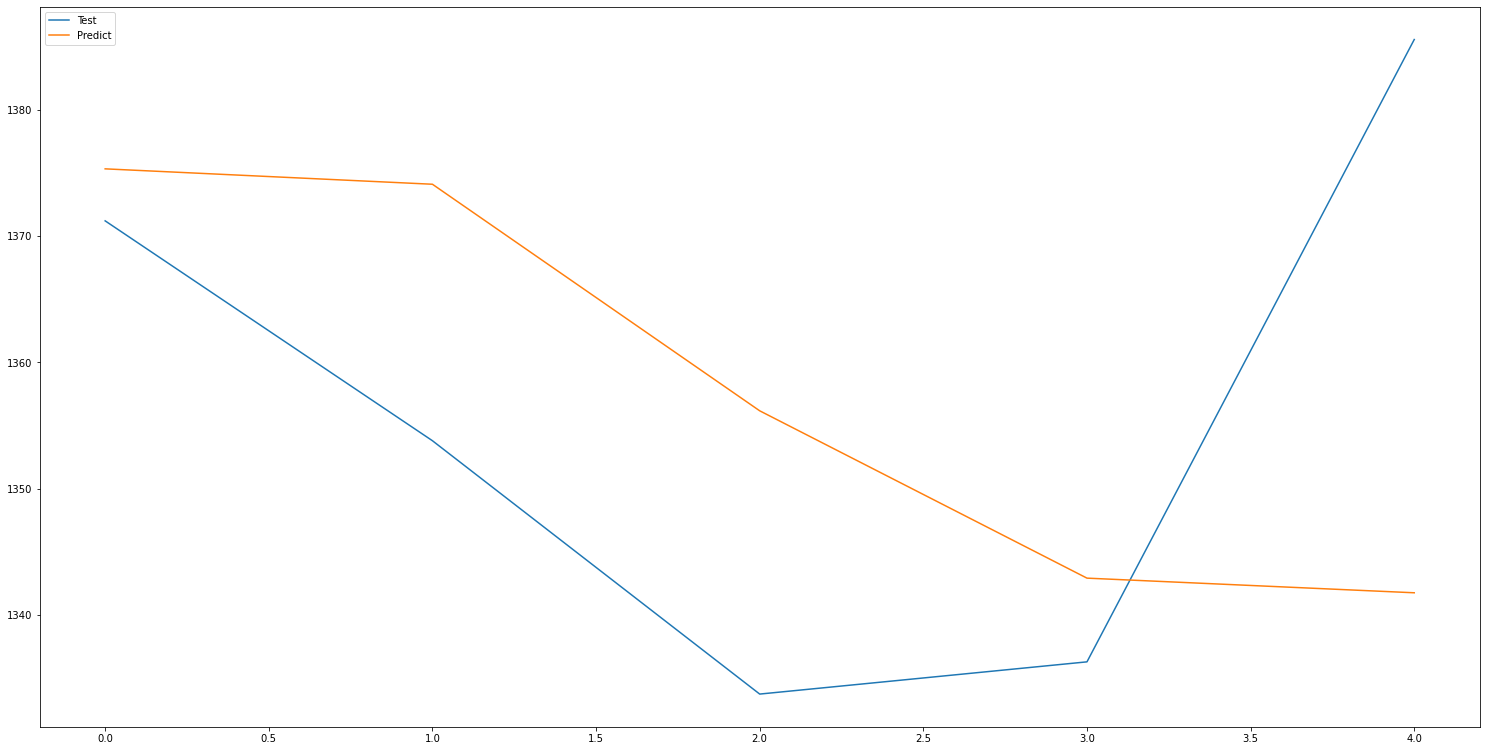

In [37]:
# graph is plotted here

import matplotlib.pyplot as plt
%matplotlib inline

fig1 = plt.figure(figsize=(20,10))
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(range(len(test[-5:])),test[-5:],label='Test')
ax1.plot(range(len(model_predictions[-5:])),model_predictions[-5:],label='Predict')
ax1.legend()
plt.show()

In [35]:
# different errors are declare here

from math import sqrt
from sklearn.metrics import mean_squared_error
MSE_error = mean_squared_error(test, model_predictions)
print('Testing Root Mean Squared Error :  {}'.format(sqrt(MSE_error)))

from sklearn.metrics import mean_squared_error
MSE_error1 = mean_squared_error(test, model_predictions)
print('Testing Mean Squared Error : {}'.format(MSE_error1))


from sklearn.metrics import mean_absolute_error
MSE_error2 = mean_absolute_error(test, model_predictions)
print('Testing mean_absolute_error : {}'.format(MSE_error2))

from sklearn.metrics import r2_score
MSE_error3 = r2_score(test, model_predictions)
print('Testing r squared_score : {}'.format(MSE_error3))

Testing Root Mean Squared Error :  22.198424295830165
Testing Mean Squared Error : 492.7700412177029
Testing mean_absolute_error : 17.12893895969504
Testing r squared_score : 0.7501781864340777
